# De zingende staaf
Python script behorende bij de demoproef de zingende staaf waarin de elasticiteitsmodulus van een metaal wordt bepaald door de frequentie te meten wanneer de staaf op de kopse kant geslagen wordt.

Op basis van een theoretische afleiding verwachten we: $f^2 = \frac{E}{4\rho L^2}$. De elasticiteitsmodulus van messing is bekend, nl: $E_{messing}=100$GPa. Die van aluminium is $E_{Al}=69$ GPa.

In [5]:
#Inladen van de benodigde libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [6]:
#functie voor het berekenen van E in GPa
def eenpuntsbepaling(rho,L,f):
    return 4*rho*L**2*f**2/1e9 

In [7]:
def rho(m,L,d):
    return m /(np.pi*d**2/4*L)

#Metingen
L_Al = np.array([39.9, 60.0, 79.9, 99.8, 119.9])*1e-2 #m
f_Al = np.array([]) #Hz
rho_Al = rho(796.5e-3,39.9e-2,30.0e-3) #kg/m^3


#f = np.array([]) #Hz
#L_messing = np.array([39.1, 60.1, 76.1, 111])*1e-2 #m
#f_messing = np.array([]) #Hz
#rho_messing = 8.73e3 #kg/m^3

In [8]:
#Berekenen van E op basis van de losse metingen
print(eenpuntsbepaling(rho_Al,L_Al,f_Al))

[73.84673227 74.28686336 74.26316901 73.85158463 74.16310351]


Bereken op basis van de metingen het gemiddelde van de elasticiteitsmodulus van messing.



In [ ]:
#jouw code


Zorgvuldiger is om de elasticiteitsmodulus te bepalen op basis van een functiefit. De relatie tussen $f$ en $L$ is van de vorm $f(x) = \frac{a}{x}$, waarin $a$ een constante is. Om dit verband te onderzoeken maken we twee grafieken, $f$ tegen $L$ en $\frac{1}{f^2}$ tegen $L^2$. Dit laatste verband zou een rechtevenredig verband moeten geven. 

Maak beide grafieken. Denk aan de aslabels en de bijbehorende eenheden!

In [ ]:
#Jouw code



Om de figuren goed met elkaar te vergelijken kun je gebruik maken van een subplot. Hieronder zie je hoe dat kan. We slaan de grafiek ook op. Dat kan als eps (vectortekening) zodat je kunt blijven inzoomen en je nog steeds geen pixels ziet, of als jpg met heel hoge resolutie. Controleer dat beide grafieken zijn opgeslagen in je workspace.

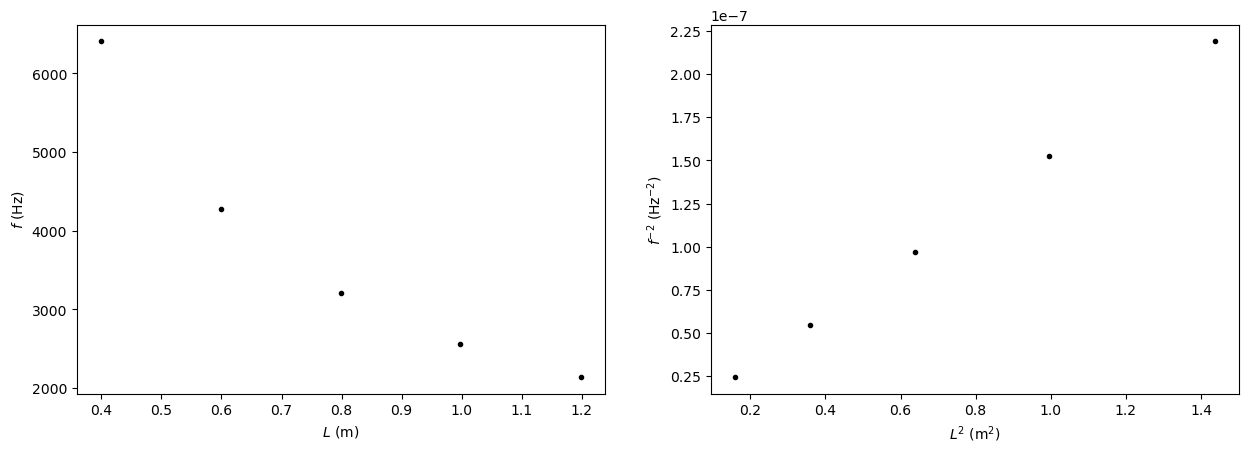

In [9]:
#subplots van de data
fig, (fig1, fig2) = plt.subplots(1,2)
fig.set_figwidth(15)

fig1.plot(L_Al,f_Al,'k.')
fig1.set(xlabel='$L$ (m)', ylabel = '$f$ (Hz)')

fig2.plot(L_Al**2,1/f_Al**2,'k.')
fig2.set(xlabel='$L^2$ (m$^2$)', ylabel='$f^{-2}$ (Hz$^{-2}$)')

plt.savefig('subplot_data.eps')
plt.savefig('subplot_data.jpg', dpi = 600)

plt.show()

Om de elasticiteitsmodulus te bepalen op basis van een fit, moeten we eerst een fitfunctie definieren. De functie die we verwachten is: $f^2 = \frac{E}{4\rho L^2}$, de fitfunctie die we gebruiken is van de vorm: $y=\frac{a}{x}$. 

* Laat zien dat geldt: $a^2 = \frac{E}{4 \rho}$

De curve_fit geeft twee variabelen (var en cov) terug. De eerste (Var) geeft de waarde van $a$ en de tweede geeft de onzekerheid terug. 

* Bereken op basis van de waarde van $a$ de elasticiteitsmodulus.

In [12]:
#fitfunctie 
def fitfunctie(L,a):
    return a/L

#fitten
var, cov = curve_fit(fitfunctie,f_Al,L_Al)
print(var)

#jouw code

[2558.81502985]


We willen natuurlijk ook kunnen zien hoe goed onze waarde matcht met onze data. Daartoe maken we een test variabele (xtest) en rekenen voor al die punten uit wat volgende de curve_fit de bijbehorende waarde moet zijn. Daarna plotten we deze.

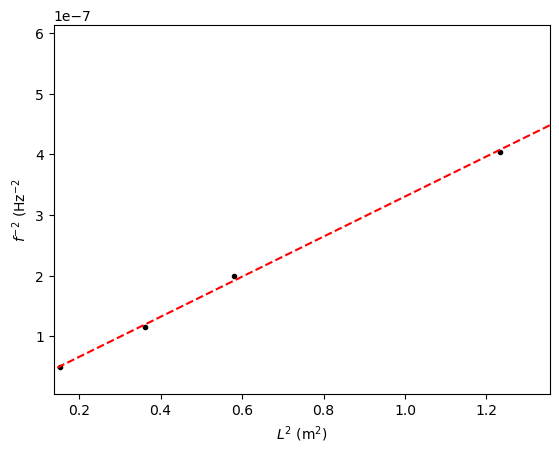

In [14]:
#test dataset die f uitrekent voor verschillende L
xtest = np.linspace(0.8*min(L),1.2*max(L),1000)
ytest = fitfunctie(xtest,var)

#Plotten van de data en de fit
plt.figure()
plt.plot(L**2,1/f**2,'k.')
plt.plot(xtest**2,1/ytest**2,'r--')
plt.xlim(0.9*min(L**2),1.1*max(L**2))
plt.xlabel('$L^2$ (m$^2$)')
plt.ylabel('$f^{-2}$ (Hz$^{-2}$')
plt.show()

Leg de bovenstaande stappen van de analyse uit: Wat gebeurt er in elke stap? 

In [ ]:
# antwoord:


In [ ]:
#your code


In [ ]:
f_messing = np.array([4468, 2939, 2243, 1574])
f_Al = np.array([6402,4271,3206,2560,2135])